In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
auto.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
               'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cyclinders',
                'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-num', 'city-mog', 'highway-mpg', 'price']

In [3]:
print("auto's format: {}".format(auto.shape))

auto's format: (205, 26)


In [4]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-num,city-mog,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
auto = auto[['price', 'horsepower','width', 'height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [6]:
auto = auto.replace('?', np.nan).dropna()
print("auto's format: {}".format(auto.shape))

auto's format: (199, 4)


In [7]:
print("auto's data type: {}".format(auto.dtypes))

auto's data type: price          object
horsepower     object
width         float64
height        float64
dtype: object


In [8]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
auto.dtypes

price           int64
horsepower      int64
width         float64
height        float64
dtype: object

In [9]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = auto.drop('price', axis=1)
y = auto['price']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

     horsepower  width  height
0           111   64.1    48.8
1           111   64.1    48.8
2           154   65.5    52.4
3           102   66.2    54.3
4           115   66.4    54.3
..          ...    ...     ...
200         114   68.9    55.5
201         160   68.8    55.5
202         134   68.9    55.5
203         106   68.9    55.5
204         114   68.9    55.5

[199 rows x 3 columns]
0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 199, dtype: int64


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

print('決定係数(train): {:.3f} '.format(model.score(X_train, y_train)))
print('決定係数(test): {:.3f}'.format(model.score(X_test, y_test)))

print('回帰係数:\n {}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {}'.format(model.intercept_))

決定係数(train): 0.733 
決定係数(test): 0.737
回帰係数:
 horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片: -128409.0463033856


In [12]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
adult.columns = ['age', 'workclass','fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',
                'capital-loss', 'hours-per-week', 'native-country', 'flg-50K']

In [13]:
print(adult.shape)

(32561, 15)


In [14]:
print(adult.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
flg-50K           0
dtype: int64


In [15]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [17]:
adult['fin-flg'] = adult['flg-50K'].map(lambda x: 1 if x == ' >50K' else 0)

In [18]:
adult.groupby('fin-flg').size()

fin-flg
0    24720
1     7841
dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]
y = adult['fin-flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print(X)
print(y)

       age  fnlwgt  education-num  capital-gain  capital-loss
0       39   77516             13          2174             0
1       50   83311             13             0             0
2       38  215646              9             0             0
3       53  234721              7             0             0
4       28  338409             13             0             0
...    ...     ...            ...           ...           ...
32556   27  257302             12             0             0
32557   40  154374              9             0             0
32558   58  151910              9             0             0
32559   22  201490              9             0             0
32560   52  287927              9         15024             0

[32561 rows x 5 columns]
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: fin-flg, Length: 32561, dtype: int64


In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('正解率(train): {:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test, y_test)))

正解率(train): 0.797
正解率(test): 0.798


In [21]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [22]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]
y = adult['fin-flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print(X)
print(y)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, y_train)
print('正解率(train): {:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test_std, y_test)))

       age  fnlwgt  education-num  capital-gain  capital-loss
0       39   77516             13          2174             0
1       50   83311             13             0             0
2       38  215646              9             0             0
3       53  234721              7             0             0
4       28  338409             13             0             0
...    ...     ...            ...           ...           ...
32556   27  257302             12             0             0
32557   40  154374              9             0             0
32558   58  151910              9             0             0
32559   22  201490              9             0             0
32560   52  287927              9         15024             0

[32561 rows x 5 columns]
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: fin-flg, Length: 32561, dtype: int64
正解率(train): 0.811
正解率(test): 0.810


In [24]:
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

linear = LinearRegression()
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)

for model in [linear, ridge, lasso]:
    model.fit(X_train, y_train)
    print('正解率(train): {:.6f}'.format(model.score(X_train, y_train)))
    print('正解率(test): {:.6f}'.format(model.score(X_test, y_test)))
    print('=====================')
    
# 重回帰の方がtrain scoreが高い
# testの正解率はRidgeの方が高いのがポイント

正解率(train): 0.733358
正解率(test): 0.737069
正解率(train): 0.733355
正解率(test): 0.737768
正解率(train): 0.733358
正解率(test): 0.737107


In [26]:
mldb_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/'

In [27]:
url = mldb_url + 'mushroom/agaricus-lepiota.data'
res = requests.get(url).content
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mushroom.columns = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'odor', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size',
                                                       'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 
                   'stalk_color_above_ling', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color',
                   'population', 'habitat']

In [28]:
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ling,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [29]:
mushroom.shape

(8124, 23)

In [30]:
mushroom.isnull().sum()

classes                     0
cap_shape                   0
cap_surface                 0
cap_color                   0
odor                        0
bruises                     0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ling      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [31]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color', 'gill_attachment', 'odor', 'cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

In [33]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [34]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [35]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.000

In [36]:
- (0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011

In [37]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1-p) * np.log2((1-p)))

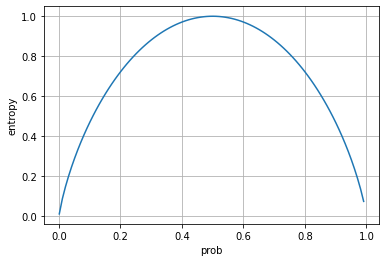

In [38]:
p = np.arange(0.001, 0.999, 0.01)

plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [39]:
entropy_init = calc_entropy(mushroom_dummy[mushroom_dummy['flg'] == 1]['flg'].count() / mushroom_dummy['flg'].count())
print('エントロピーの初期値:', entropy_init)

エントロピーの初期値: 0.9990678968724603


In [40]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [41]:
p1 = 4176/(4176+3904)
ent1 = calc_entropy(p1)
# cap colorがcでない場合のエントロピー

In [42]:
p2 = 32/(32+12)
ent2 = calc_entropy(p2)
# cap colorがcである場合のエントロピー

In [43]:
mushroom_dummy.flg.count()

8124

In [44]:
entropy_after = (4176+3904)/8124*ent1 + (32+12)/8124*ent2
print('データ分割後の平均エントロピー:', entropy_after)
print('情報利得:', entropy_init - entropy_after)

データ分割後の平均エントロピー: 0.9983492394158581
情報利得: 0.0007186574566022674


In [45]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [46]:
#gill colorがbでない場合のエントロピー
p3 = 4208/(4208+2188)
ent3 = calc_entropy(p3)

#gill colorがbの場合のエントロピー
p4 = 0/(0+1728)
ent4 = - (1-p4)*np.log2(1-p4)

In [47]:
entropy_after = ((4208+2188)/8124)*ent3 + ((0+1728)/8124)*ent4
print(entropy_init - entropy_after)

0.2693983473195207


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print('正解率(train): {:.6f}'.format(model.score(X_train, y_train)))
print('正解率(test): {:.6f}'.format(model.score(X_test, y_test)))

正解率(train): 0.882980
正解率(test): 0.894141


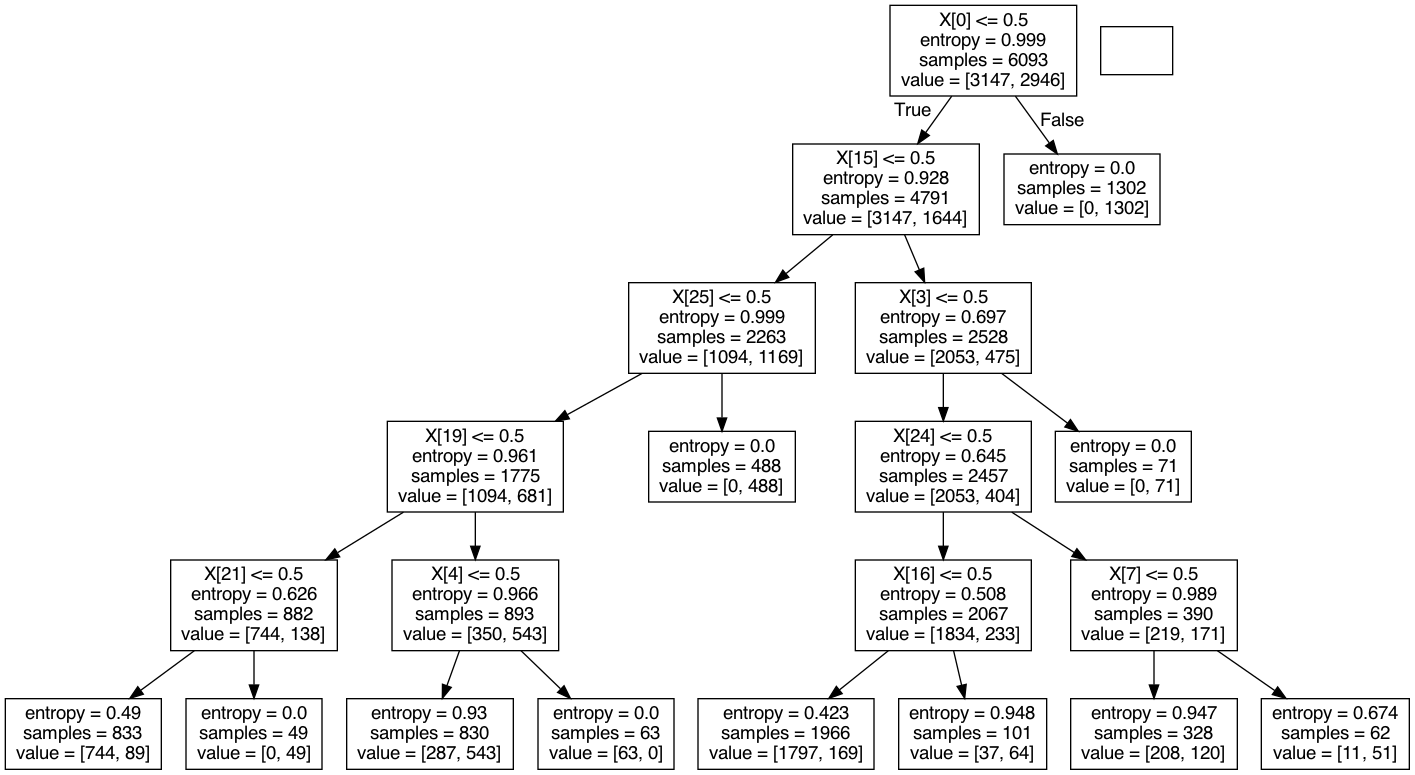

In [50]:
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [53]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [61]:
training_accuracy = []
test_accuracy = []

In [62]:
for n_neighbors in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

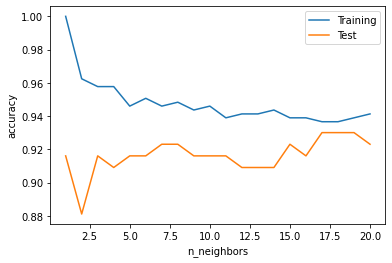

In [63]:
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

In [70]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=0)

model = LinearSVC(random_state=0)
model.fit(X_train, y_train)

print('正解率(train): {:.6f}'.format(model.score(X_train, y_train)))
print('正解率(test): {:.6f}'.format(model.score(X_test, y_test)))

正解率(train): 0.922535
正解率(test): 0.930070


/Users/toritakashi/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LinearSVC(random_state=0)
model.fit(X_train_std, y_train)

print('正解率(train): {:.6f}'.format(model.score(X_train_std, y_train)))
print('正解率(test): {:.6f}'.format(model.score(X_test_std, y_test)))

正解率(train): 0.992958
正解率(test): 0.951049
